# TweetToVect

## Idea
Crear embeddgins de tweets.

INPUT:<br>
Array de embeddings de fasttext (ver WordEmbeddings.ipynb)<br>

OUTPUT:<br>
Embeddings (100d) de tweet.
<img src='img/red_tweet_to_vect.jpg' />

In [1]:
import pandas as pd
import numpy as np
import gensim
import seaborn as sns
from matplotlib import pyplot
import sys
import math

In [2]:
word_model = gensim.models.fasttext.load_facebook_vectors("../models/words_fast_text.bin")

In [3]:
print('Length of vectors', len(word_model.get_vector(' ')))

Length of vectors 100


In [4]:
df = pd.read_pickle('../datasets/tweets_cleaned.pkl')

In [5]:
df = df[df.lang=='es']

In [6]:
df.sample(10)[['full_text', 'full_text_cleaned']]

,full_text,full_text_cleaned
1243327574530539523,"Entraron a la cuarentena a ciegas, demasiado p...",entraron cuarentena ciegas demasiado pronto da...
1285932114567933953,¡Buen día! Compartimos la excelente nota de He...,buen día ! compartimos excelente nota hernán g...
1287184963641790464,"Bien debe ser destituido y estar preso, sino e...",bien debe ser destituido preso sino convierte ...
1101655241358016513,Vamos Argentina! El momento es hoy. #1M https:...,vamos argentina ! momento hoy # 1m URL
1208225237227184129,"Si sos senador oficialista, que debería pesar...",si sos senador oficialista debería pesar ? gan...
1266324833727582210,#AHORA 📞 Hablamos con la concejala @NormaLopez...,# ahora 📞 hablamos concejala @ normalopezsf in...
1224681973060378624,@florencialcaraz Que es el mismo hueco por el ...,@ florencialcaraz mismo hueco hace tiempo cayó...
1255666311868420109,Los presos le impusieron al Estado la liberaci...,presos impusieron liberación ámbito fácil gest...
1280888268708593664,El Gobierno desvincula al agua del H2O. https:...,gobierno desvincula agua h2o URL
720384315645792256,Voluntarios Digitales \n#AlertaSolidario \nNos...,voluntarios digitales # alertasolidario falta ...


In [7]:
tokenize = lambda text: text.split(' ')
df_word_sample = df.sample(1000000)
tweets_l = df_word_sample.full_text_cleaned.apply(lambda text: len(tokenize(text)))

Cantidad de palabras por tweet (no stopwords) (1.000.000 tweets):


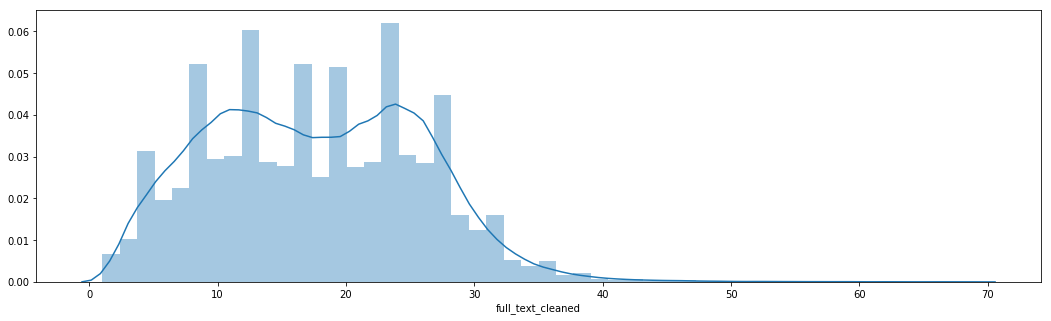

In [8]:
print('Cantidad de palabras por tweet (no stopwords) (1.000.000 tweets):')
fig, ax = pyplot.subplots(figsize=(18,5))
sns.distplot(tweets_l[tweets_l<70])
pyplot.show()

In [9]:
long_tweets = df_word_sample[tweets_l>20].full_text_cleaned.values[:5]
for i in long_tweets:
    print(i)
    print('')

# huracán 🎈 jornada capacitación jugadores cuerpo técnico reserva día ayer secretaría género diversidad sexual club realizó primera jornada plantel comanda nazareno brindisi 👉 URL URL

sé tiempos difíciles quiero pedirte esfuerzo # santafe país aislamiento social obligatorio sigue vigente cambió implica cosas si no sos parte trabajadores esenciales tenés quedarte casa

propuesta reperfilamiento deuda externa @ alferdez acompañado totalidad provincias importar partido político gobernador gobernadora argentina pagará deuda sostenible no costa sufrimiento pueblo # argentinaunida 🇦 🇷 URL

destaco labor todas legisladores declararon interés provincial # acuerdosanjuan representa símbolo consenso diálogo construiremos provincia supere contexto afronte desafíos futuros URL URL

gobierno derogó doctrina militar mauricio macri vuelve cristina kirchner fuerzas armadas solo podrán combatir extranjero no pueden enfrentar organizaciones qaeda URL



In [10]:
short_tweets = df_word_sample[tweets_l < 20].full_text_cleaned.values[:5]
for i in short_tweets:
    print(i)
    print('')

llévame presa voy romper cuarentena ir votarte vez

🔴 paraná stj abandona empelados municipales falla favor intendente nota 👉 URL URL

caso covid 19 hospital ferreyra hicieron decenas testeos gt gt URL URL

resultado octubre otorga responsabilidad dos años quedan vamos trabajar doble @ moralesgerardo1 URL

# politica @ oscar_parrilli destacó @ vocesmundo tarea llevando cabo afi URL



In [11]:
tweets_length = df.full_text_cleaned.apply(lambda text: len(tokenize(text)))

In [12]:
df.loc[:,'tweet_l'] = tweets_length

In [399]:
np.round((np.random.rand()) * 8)
train_df = df[(df.favorite_count >= 10) & (df.lang == 'es') & (df.tweet_l > 8)]
print(len(train_df))
train_df.head()

754181


,tweet_id,conversation_id,user_id,created_at,lang,retweet_count,favorite_count,reply_count,quote_count,is_reply,...,full_text,source,scrapped_at,user_mentions_count,hashtags_count,urls_count,media_count,replied_original,full_text_cleaned,tweet_l
1000002668474101761,1000002668474101761,1000002668474101761,69668594,2018-05-25 13:16:29.0,es,5,23,0,0,0,...,🇦🇷 La Patria somos todos y la construimos junt...,Twitter for Android,2020-07-28 02:21:15.0,0,2,0,1,NaN,🇦 🇷 patria construimos juntos # felizdíadelapa...,10
1000003529396883456,1000003529396883456,1000003529396883456,180503498,2018-05-25 13:19:55.0,es,1,10,1,1,0,...,Participando del Tedeum por el #25deMayo en la...,Twitter for Android,2020-07-28 03:57:02.0,0,2,0,3,NaN,participando tedeum # 25demayo parroquia santa...,11
1000004585124253699,1000004585124253699,1000004585124253699,174010839,2018-05-25 13:24:06.0,es,7,50,2,0,0,...,Feliz día de la patria!! El día que comenzamos...,Twitter for iPhone,2020-07-28 15:08:21.0,0,0,0,1,NaN,feliz día patria ! día comenzamos ser libres URL,9
1000004674483900418,1000004674483900418,1000004674483900418,3092373641,2018-05-25 13:24:28.0,es,31,128,6,0,0,...,Muchas gracias a todos los vecinos que me acom...,Twitter for Android,2020-07-28 05:33:44.0,0,1,0,4,NaN,muchas gracias vecinos acompañaron tradicional...,16
1000005932535959553,1000005932535959553,1000005932535959553,705009982438318080,2018-05-25 13:29:28.0,es,6,13,0,0,0,...,"""Hoy es un día importante para la provincia, p...",TweetDeck,2020-07-28 02:22:26.0,0,0,0,0,NaN,hoy día importante provincia día patria inagur...,14


## Estrategia para lidiar con los largos de los tweets
La red va a terner 2 inputs:
- t1 t2 ... t20 (inicio de la frase)
- t-1 t-2 ... t-20 (frase invertida)

Los tweets muy cortos seran repetidos máximo una vez. Si su largo no alanza, se completa con padding.

In [400]:
def get_vectors(tweet, length=10, dim=100):
    arr = [ word_model.get_vector(w) for w in tokenize(tweet) ]
    arr = arr+arr
    arr_inv = arr[::-1]
    arr = np.array(arr)
    arr_inv = np.array(arr_inv)
    if(len(arr)==length):
        return [arr, arr_inv]
    elif(len(arr)<length):
        to_add = np.zeros((length - len(arr), dim))
        return [np.concatenate([arr, to_add]), np.concatenate([arr_inv, to_add])]
    else:
        return [arr[0:length], arr_inv[0:length]]

print(get_vectors('hi this is a tweet')[0].shape)
print(get_vectors('hi this is a very very very very very very very very very very very very very very very long tweet with more than 25 words ! 😊')[0].shape)

(10, 100)
(10, 100)


In [15]:
get_vectors('hi this is a tweet')

[array([[ 0.10836364,  0.0278185 , -0.50520957, ..., -0.569399  ,
         -1.03965211,  0.40383402],
        [ 0.53312916,  0.19095655, -0.02953227, ...,  0.11897559,
         -1.57449877, -0.24043569],
        [ 0.48872438,  0.04325911,  0.51331085, ..., -0.14464097,
         -0.72130805, -0.39419889],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]]),
 array([[ 0.24735637, -0.20309554,  0.60416889, ..., -0.3391051 ,
         -0.73890144,  0.35681111],
        [ 0.207982  ,  0.05754891, -0.00807469, ..., -0.08669736,
         -0.04393448, -0.00296706],
        [ 0.48872438,  0.04325911,  0.51331085, ..., -0.14464097,
         -0.72130805, -0.39419889],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  

## keras transformer

In [16]:
import tensorflow_addons as tfa
from tensorflow.python.keras import layers
from tensorflow.python.keras import losses
from tensorflow.python.keras import models
from tensorflow.python.keras import backend as K  
import tensorflow as tf
from tensorflow.python import keras

In [17]:
tf.__version__

'2.2.0'

In [18]:
class MultiHeadSelfAttention(layers.Layer):
    def __init__(self, embed_dim, num_heads=8, **kwargs):
        super(MultiHeadSelfAttention, self).__init__(**kwargs)
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        if embed_dim % num_heads != 0:
            raise ValueError(
                f"embedding dimension = {embed_dim} should be divisible by number of heads = {num_heads}"
            )
        self.projection_dim = embed_dim // num_heads
        self.query_dense = layers.Dense(embed_dim)
        self.key_dense = layers.Dense(embed_dim)
        self.value_dense = layers.Dense(embed_dim)
        self.combine_heads = layers.Dense(embed_dim)
    
    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'embed_dim': self.embed_dim,
            'num_heads': self.num_heads
        })
        return config
        
    def attention(self, query, key, value):
        score = tf.matmul(query, key, transpose_b=True)
        dim_key = tf.cast(tf.shape(key)[-1], tf.float32)
        scaled_score = score / tf.math.sqrt(dim_key)
        weights = tf.nn.softmax(scaled_score, axis=-1)
        output = tf.matmul(weights, value)
        return output, weights

    def separate_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.projection_dim))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, inputs):
        # x.shape = [batch_size, seq_len, embedding_dim]
        batch_size = tf.shape(inputs)[0]
        query = self.query_dense(inputs)  # (batch_size, seq_len, embed_dim)
        key = self.key_dense(inputs)  # (batch_size, seq_len, embed_dim)
        value = self.value_dense(inputs)  # (batch_size, seq_len, embed_dim)
        query = self.separate_heads(
            query, batch_size
        )  # (batch_size, num_heads, seq_len, projection_dim)
        key = self.separate_heads(
            key, batch_size
        )  # (batch_size, num_heads, seq_len, projection_dim)
        value = self.separate_heads(
            value, batch_size
        )  # (batch_size, num_heads, seq_len, projection_dim)
        attention, weights = self.attention(query, key, value)
        attention = tf.transpose(
            attention, perm=[0, 2, 1, 3]
        )  # (batch_size, seq_len, num_heads, projection_dim)
        concat_attention = tf.reshape(
            attention, (batch_size, -1, self.embed_dim)
        )  # (batch_size, seq_len, embed_dim)
        output = self.combine_heads(
            concat_attention
        )  # (batch_size, seq_len, embed_dim)
        return output
    
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1, **kwargs):
        super(TransformerBlock, self).__init__(**kwargs)
        
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.ff_dim = ff_dim
        self.rate = rate
        
        self.att = MultiHeadSelfAttention(embed_dim, num_heads, **kwargs)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)
        
    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'embed_dim': self.embed_dim,
            'num_heads': self.num_heads,
            'ff_dim': self.ff_dim,
            'rate': self.rate,
        })
        return config

    def call(self, inputs, training):
        attn_output = self.att(inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

    
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, sentence_length, embed_dim, **kwargs):
        super(TokenAndPositionEmbedding, self).__init__()
        self.pos_emb = layers.Embedding(input_dim=sentence_length, output_dim=embed_dim)

    def call(self, x):
        return x
        positions = tf.range(start=0, limit=len(x), delta=1)
        positions = self.pos_emb(positions)
        return x + positions
    
class UpscaleDense(layers.Layer):
    def __init__(self, heads, units, activation='relu'):
        super(UpscaleDense, self).__init__()
        self.heads = heads
        self.units = units
        self.denseLayer = layers.Dense(units, activation=activation)
    def call(self, x):
        x_ = [self.denseLayer(x) for _ in range(self.heads)]
        x_ = tf.keras.backend.stack(x_, axis=1)
        
        positional = layers.Embedding(input_dim=self.heads, output_dim=self.units)(tf.range(start=0, limit=25, delta=1))
        
        return x_ + positional
    
def upscaleDense(x, heads, units, activation='relu'):
    denseLayer = layers.Dense(units, activation=activation)
    x_ = [denseLayer(x) for _ in range(heads)]
    x_ = tf.keras.backend.stack(x_, axis=1)
    positional = layers.Embedding(input_dim=heads, output_dim=units)(tf.range(start=0, limit=25, delta=1))
    return x_

In [412]:
maxlen = 10  # Only consider the first 20 words of each tweet
embed_dim = 100  # Embedding size for each token
num_heads = 100  # Number of attention heads
ff_dim = 512  # Hidden layer size in feed forward network inside transformer
residual_size = 30

inputs = layers.Input(shape=(maxlen,embed_dim), name='input')
inputs_inv = layers.Input(shape=(maxlen,embed_dim), name='input_inv')
input_concat = keras.layers.concatenate([inputs, inputs_inv], axis=1)
residual_input = layers.Dense(residual_size, activation='linear')(input_concat)

pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

positions = tf.range(start=0, limit=maxlen, delta=1)
positions_inv = tf.range(start=maxlen-1, limit=-1, delta=-1)

x = inputs + pos_emb(positions)
x_inv = inputs_inv + pos_emb(positions_inv)
x = layers.BatchNormalization(axis=1)(x)
x_inv = layers.BatchNormalization(axis=1)(x_inv)

transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x_inv = transformer_block(x_inv)
x = layers.BatchNormalization(axis=1)(x)
x_inv = layers.BatchNormalization(axis=1)(x_inv)
x = layers.Dense(100, activation='elu')(x) # shape=(None, 15, 100)
x_inv = layers.Dense(100, activation='elu')(x_inv) # shape=(None, 15, 100)
x = keras.layers.concatenate([x, x_inv], axis=1) #join both inputs

x = layers.Flatten()(x) # shape=(None, 500)
x = layers.BatchNormalization()(x)

encoder_mu = layers.Dense(150, activation='linear', name='encoder_mu')(x)
# encoder_log_var = layers.Dense(150, activation='linear', name='encoder_log_var')(x)

encoder = keras.Model(inputs={'vectors':inputs, 'vectors_inv':inputs_inv}, outputs=[encoder_mu, residual_input], name='encoder')

decoder_input = layers.Input(shape=150)
decoder_input_2 = layers.Input(shape=(maxlen*2,residual_size))

upscaled = []

up_1 = layers.Dense(200, activation='elu')
up_2 = layers.Dense(100, activation='elu')
up_3 = layers.Dense(150, activation='elu')
norm_1 = layers.BatchNormalization(axis=1, name='ba')
norm_2 = layers.BatchNormalization(axis=1, name='ba2')

for i in range(maxlen*2):
    decoder_residual = keras.layers.concatenate([decoder_input, decoder_input_2[:, i]])
    x = up_1(decoder_residual)
    x_1 = up_2(decoder_input)
    x = keras.layers.concatenate([x, x_1])
    x = norm_1(x)
    x = up_3(x)
    x = keras.layers.Dense(100, activation='elu')(x)
    x = norm_2(x)
    upscaled.append(x)

x = tf.keras.backend.stack(upscaled, axis=1)
decoder_output = layers.Dense(embed_dim, activation='linear', name='word_'+str(i))(x)
decoder = keras.Model([decoder_input, decoder_input_2], decoder_output, name="decoder")

In [408]:
display(encoder.summary())
display(decoder.summary())

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 10, 100)]    0                                            
__________________________________________________________________________________________________
input_inv (InputLayer)          [(None, 10, 100)]    0                                            
__________________________________________________________________________________________________
tf_op_layer_AddV2_100 (TensorFl [(None, 10, 100)]    0           input[0][0]                      
__________________________________________________________________________________________________
tf_op_layer_AddV2_101 (TensorFl [(None, 10, 100)]    0           input_inv[0][0]                  
____________________________________________________________________________________________

None

Model: "decoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_69 (InputLayer)           [(None, 20, 30)]     0                                            
__________________________________________________________________________________________________
input_68 (InputLayer)           [(None, 150)]        0                                            
__________________________________________________________________________________________________
tf_op_layer_strided_slice_755 ( [(None, 30)]         0           input_69[0][0]                   
__________________________________________________________________________________________________
tf_op_layer_strided_slice_756 ( [(None, 30)]         0           input_69[0][0]                   
____________________________________________________________________________________________

None

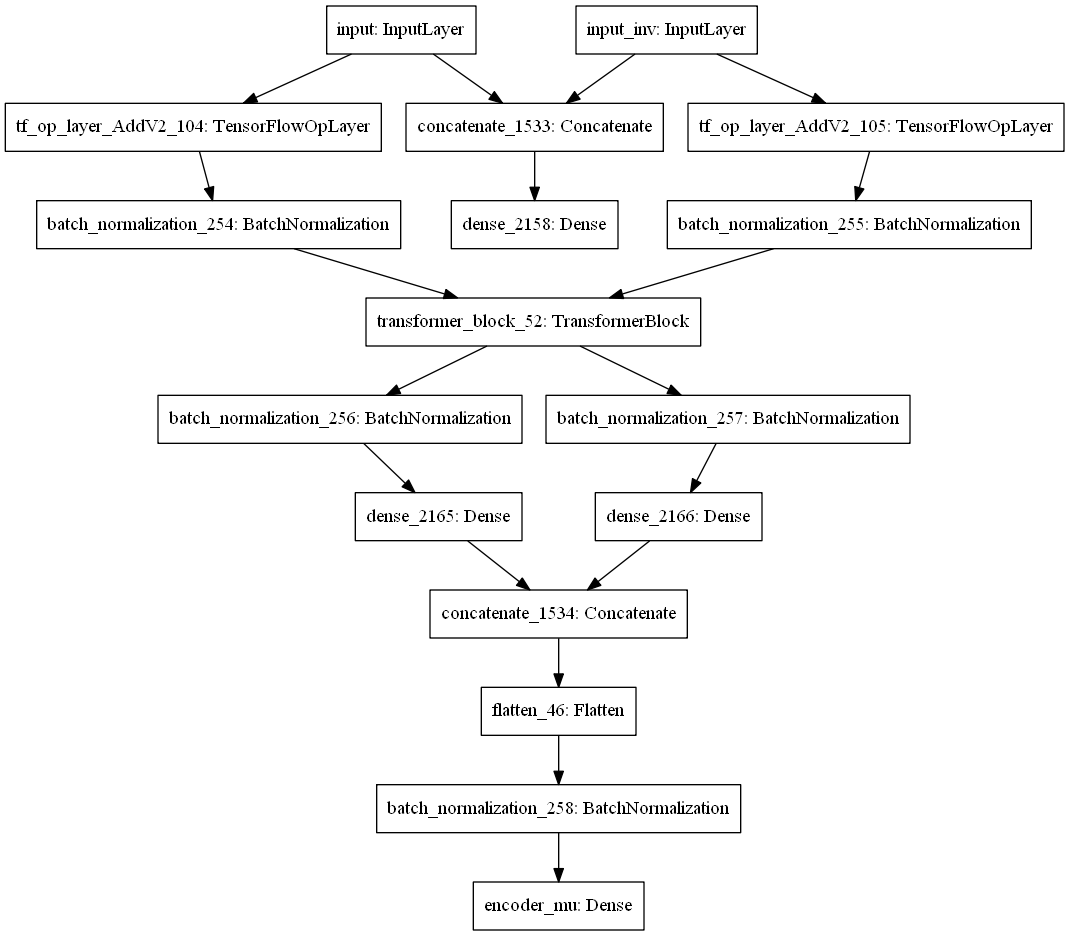

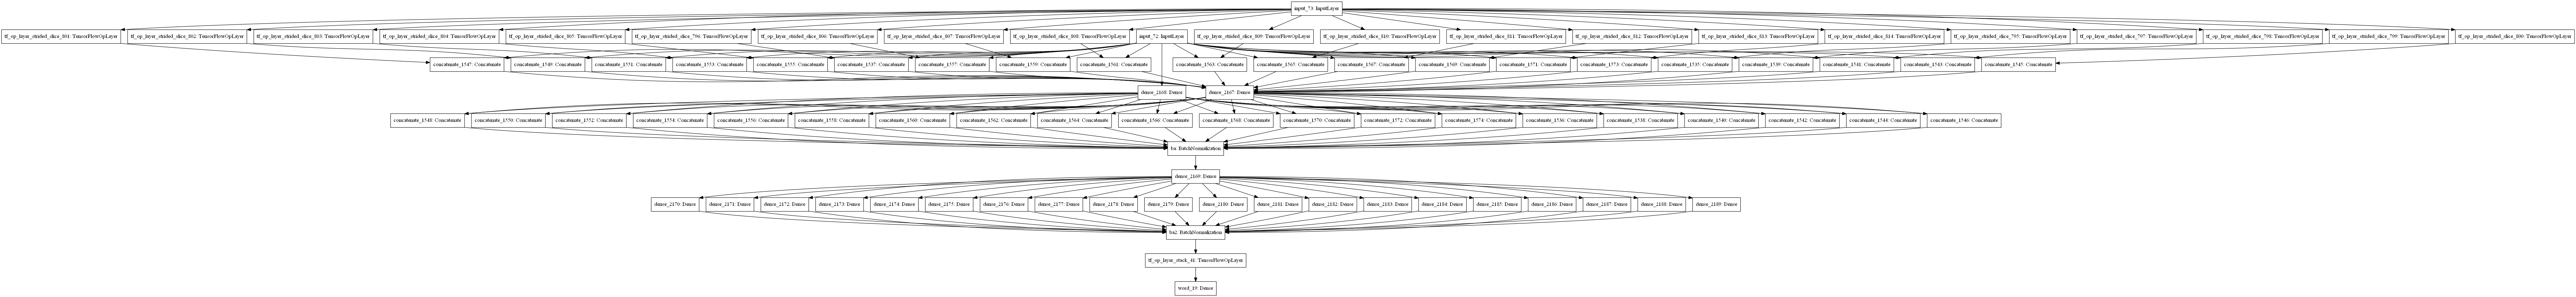

In [413]:
# import os
# os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
from tensorflow.keras.utils import plot_model
display(plot_model(encoder))
plot_model(decoder)

## loss

In [24]:
# !pip install -e git+https://github.com/garydoranjr/pyemd.git#egg=pyemd --user
import sklearn
import sklearn.metrics

In [267]:
def sampling(mu, log_var):
    z_mean, z_log_var = mu, log_var
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    # by default, random_normal has mean = 0 and std = 1.0
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

# Pérdida de reconstrucción
def r_loss(y_true, encodings):
    y_true = tf.convert_to_tensor(y_true, dtype=tf.float32)
    cosine_loss = tf.keras.losses.CosineSimilarity(axis=2, reduction='none')
    loss = cosine_loss(y_true, encodings)
    loss = tf.keras.backend.mean(loss, axis=1)
    return loss


# Divergencia KL
def kl_loss(mu, log_var):
    return -0.5 * K.sum(1 + log_var - K.square(mu) - K.exp(log_var), axis=-1)
#     return -0.5 * K.sum(1 + log_var - K.square(mu)- K.exp(log_var), axis = 1)


def vae_loss(encoder, decoder, input_tensor):
    
    encoded, residual = encoder(data_batch['inputs'])
#     encoded = sampling(mu, log_var)
    decoded = decoder([encoded, residual])
    
    return K.mean(r_loss(data_batch['output'], decoded))
    
    r_l = r_loss(data_batch['output'], decoded) #loss reconstruccion
    k_l = kl_loss(mu, log_var)
    loss = (k_l) * (r_l * 10000)
    return K.mean(loss), K.mean(r_l), K.mean(k_l)

data_batch = next(data_generator(train_df, 5))
vae_loss(encoder, decoder, data_batch)

<tf.Tensor: shape=(), dtype=float32, numpy=0.010503033>

## generator

In [415]:
def data_generator(df, batch_size, text_size=10, dim=100):
    while True:
        min_l = np.round((np.random.rand()) * 8)
        df = df[(df.favorite_count >= 5) & (df.lang == 'es') & (df.tweet_l > min_l)]
        batch_df = df.sample(batch_size)
        vectors_list = batch_df.full_text_cleaned.apply(lambda text: get_vectors(text, text_size, dim)).values
        vectors = np.array([tweet[0].tolist() for tweet in vectors_list])
        vectors_inv = np.array([tweet[1].tolist() for tweet in vectors_list])
        vectors_concat = np.concatenate([vectors, vectors_inv], axis=1)
        
        yield( {
            'inputs': {
                'vectors': vectors,
                'vectors_inv': vectors_inv
            },
            'output': vectors_concat
        } ) # x = y, autovector

In [428]:
def save_autoencoder(encoder, decoder, model_dir):
    model_json = encoder.to_json()
    with open(model_dir+"tweet_to_vect_encoder_b.json", "w") as json_file:
        json_file.write(model_json)
    encoder.save_weights(model_dir+"tweet_to_vect_encoder_b.h5")
#     print("Saved encoder to disk")
    
    model_json = decoder.to_json()
    with open(model_dir+"tweet_to_vect_decoder_b.json", "w") as json_file:
        json_file.write(model_json)
    decoder.save_weights(model_dir+"tweet_to_vect_decoder_b.h5")
#     print("Saved decoder to disk")
    
    return True

True

In [191]:
2**11

2048

In [416]:
epochs = 100
steps = 100
batch_size = 2**8
model_dir = '../models/'
history = []

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, amsgrad=True)

for e in range(epochs):
    for s in range(steps):
        with tf.GradientTape() as tape:
            data_batch = next(data_generator(df, batch_size))
            loss = vae_loss(encoder, decoder, data_batch)
            
#         sys.stdout.write(f'\rEpoch {e+1}: step {s+1}/{steps} \t loss {round(float(loss), 2)} \t r_loss {round(float(r_l), 3)} \t k_l {round(float(k_l), 3)}')
        sys.stdout.write(f'\rEpoch {e+1}: step {s+1}/{steps} \t loss {round(float(loss), 4)}')
        sys.stdout.flush()
            
        trainable_variables = encoder.trainable_variables + decoder.trainable_variables
        grads = tape.gradient(loss, trainable_variables)

        optimizer.apply_gradients(zip(grads, trainable_variables))
        if(s+1==steps):
            print('')
            history.append(loss)
            try:
                save_autoencoder(encoder, decoder, model_dir)
            except:
                print('ERROR ON SAVE')

Epoch 1: step 100/100 	 loss -0.5733
Epoch 2: step 100/100 	 loss -0.6988
Epoch 3: step 12/100 	 loss -0.7179

W0802 21:09:01.803449 15644 keyedvectors.py:2140] could not extract any ngrams from '', returning origin vector


Epoch 3: step 100/100 	 loss -0.7701
Epoch 4: step 100/100 	 loss -0.7882
Epoch 5: step 100/100 	 loss -0.7955
Epoch 6: step 100/100 	 loss -0.8041
Epoch 7: step 100/100 	 loss -0.8124
Epoch 8: step 100/100 	 loss -0.8163
Epoch 9: step 100/100 	 loss -0.8283
Epoch 10: step 56/100 	 loss -0.8279

W0802 21:17:52.299708 15644 keyedvectors.py:2140] could not extract any ngrams from '', returning origin vector


Epoch 10: step 100/100 	 loss -0.8324
Epoch 11: step 100/100 	 loss -0.8338
Epoch 12: step 100/100 	 loss -0.8275
Epoch 13: step 34/100 	 loss -0.8399

W0802 21:21:08.902189 15644 keyedvectors.py:2140] could not extract any ngrams from '', returning origin vector


Epoch 13: step 49/100 	 loss -0.8367

W0802 21:21:19.467154 15644 keyedvectors.py:2140] could not extract any ngrams from '', returning origin vector


Epoch 13: step 100/100 	 loss -0.8394
Epoch 14: step 100/100 	 loss -0.8442
Epoch 15: step 100/100 	 loss -0.8394
Epoch 16: step 100/100 	 loss -0.8514
Epoch 17: step 100/100 	 loss -0.844
Epoch 18: step 100/100 	 loss -0.8456
Epoch 19: step 100/100 	 loss -0.8537
Epoch 20: step 100/100 	 loss -0.8599
Epoch 21: step 100/100 	 loss -0.8589
Epoch 22: step 100/100 	 loss -0.8628
Epoch 23: step 100/100 	 loss -0.8619
Epoch 24: step 30/100 	 loss -0.8661

KeyboardInterrupt: 

In [307]:
#model_a -0.82
history

[<tf.Tensor: shape=(), dtype=float32, numpy=-5144.0195>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-5317.96>]

In [326]:
print(2**10)
data_batch = next(data_generator(df, 2**10))
loss, r_l = vae_loss(encoder, decoder, data_batch)

1024


In [327]:
r_l

<tf.Tensor: shape=(), dtype=float32, numpy=-0.7336625>

## load autoencoder

In [351]:
with open(model_dir+"tweet_to_vect_encoder_a.json", 'r') as f:
    loaded_model_encoder = tf.keras.models.model_from_json(f.read(), custom_objects={'TransformerBlock': TransformerBlock, 'MultiHeadSelfAttention': MultiHeadSelfAttention})
loaded_model_encoder.load_weights(model_dir+"tweet_to_vect_encoder_a.h5")

with open(model_dir+"tweet_to_vect_decoder_a.json", 'r') as f:
    loaded_model_decoder = tf.keras.models.model_from_json(f.read())
loaded_model_decoder.load_weights(model_dir+"tweet_to_vect_decoder_a.h5")

In [361]:
loaded_model_encoder.input['vectors'].shape[1]

20

In [884]:
def decode_vector(vectors):
    words = [word_model.similar_by_vector(vec, topn=1)[0][0] for vec in vectors]
    return words
def test_model(samples=10):
    for i in range(samples):
        vector,y = next(data_generator(df, 1))
    #     vector = get_vectors(text, 25,100)
        words = decode_vector(vector[0])
        print(' '.join(words))

        predicted = model.predict(vector)
        predicted = [predicted[i] for i in predicted]
        predicted = np.array(predicted).transpose(1,0,2)
        words_predicted = decode_vector(predicted[0])
        print(' '.join(words_predicted))
        print('')
        
test_model(2)

la vuelta al mundo en torino salió desde la patagonia y llegó a alaska URL @ b </s>
la wl el ryuuzakii_l en tobago oklahoma en la ceibos y 87.938.624 a slim, URL @ 𝐀𝐇𝐎𝐑𝐀 y

luchamos, igual que micaela, por construir un mundo donde las mujeres no sean oprimida donde la vi </s>
estámos kk que 𝐀𝐇𝐎𝐑𝐀 por síalbienestar un 🛴 que las las no crezcan inocentes, que la 💈 de



## test

In [48]:
import sys
import sklearn.metrics
sys.path.append("../scripts/")
import clean_text
from importlib import reload
reload(clean_text)

<module 'clean_text' from '../scripts\\clean_text.py'>

In [427]:
to_compare_texts = [
    """En una entrevista radial, el presidente @alferdez afirmó que "es una discusión falsa la cantidad de miembros que podría tener la Corte Suprema de Justicia" en la reforma judicial impulsada esta semana.""",
    """Si alguien te dio ese valor de dólar en argentina te mintió :""",
    """Gobierno genera Inflación. Luego controla el precio del dólar. Luego faltan dólares. Luego traban importaciones para no perder dólares.""",
    """A quienes justifican la necesidad de la reforma judicial x la inseguridad (robos y homicidios), les digo q la reforma oficialista se refiere a juzgados federales. El robo y el homicidio NO son competencia de los juzgados federales. Buscan impunidad no luchar contra la inseguridad""",
    """Banco Central Para contener el dólar, suben tasa de plazos fijos al 33,06%""",
    """"Por los próximos 15 quedarán prohibidas todas las reuniones sociales en todo el país", dijo  la secretaria de Acceso a la Salud, Carla Vizzotti, en el reporte matutino de este domingo.""",
    """A partir de mañana quedan suspendidas las reuniones sociales en todo el país""",
    """La responsabilidad individual es fundamental en este momento. Confío en ustedes y estoy convencido de que vamos a superar esto. Cuidemos a nuestra familia, a nuestras amistades y a nuestros compañeros y compañeras de trabajo. Cuidémonos entre todos.""",
    """En la Ciudad estamos acompañando al Gobierno nacional en los estudios que se están haciendo en el país para encontrar la vacuna contra el virus. Lanzamos una convocatoria a voluntarios y voluntarias y ya se anotaron más de 700 personas.""",
    
]
to_compare = []
for i in to_compare_texts:
    vectors_list = [get_vectors(clean_text.clean(i, True))]
    vectors = np.array([tweet[0].tolist() for tweet in vectors_list])
    vectors_inv = np.array([tweet[1].tolist() for tweet in vectors_list])
    input_model = {
        'vectors': vectors,
        'vectors_inv': vectors_inv
    }
    encoded, residual = encoder(input_model)
#     encoded = sampling(mu, log_var)
    to_compare.append(encoded[0].numpy())

# print(to_compare)
# sklearn.metrics.pairwise.cosine_similarity(to_compare, to_compare)

for i in range(len(to_compare)):
    cos_sim = sklearn.metrics.pairwise.cosine_similarity([to_compare[i]], to_compare).tolist()
    text_copy = to_compare_texts.copy()
    original_text = text_copy[i]
    del cos_sim[0][i]
    del text_copy[i]
    match_text = text_copy[np.argmax(cos_sim)]
    print('Tweet: ', original_text)
    print('ES SIMILAR A', round(cos_sim[0][np.argmax(cos_sim)], 2))
    print('Tweet: ', match_text)
    print('')

Tweet:  En una entrevista radial, el presidente @alferdez afirmó que "es una discusión falsa la cantidad de miembros que podría tener la Corte Suprema de Justicia" en la reforma judicial impulsada esta semana.
ES SIMILAR A 0.58
Tweet:  A quienes justifican la necesidad de la reforma judicial x la inseguridad (robos y homicidios), les digo q la reforma oficialista se refiere a juzgados federales. El robo y el homicidio NO son competencia de los juzgados federales. Buscan impunidad no luchar contra la inseguridad

Tweet:  Si alguien te dio ese valor de dólar en argentina te mintió :
ES SIMILAR A 0.7
Tweet:  Gobierno genera Inflación. Luego controla el precio del dólar. Luego faltan dólares. Luego traban importaciones para no perder dólares.

Tweet:  Gobierno genera Inflación. Luego controla el precio del dólar. Luego faltan dólares. Luego traban importaciones para no perder dólares.
ES SIMILAR A 0.7
Tweet:  Si alguien te dio ese valor de dólar en argentina te mintió :

Tweet:  A quienes 